<a href="https://colab.research.google.com/github/alina-nnnn/Machine_learning/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%87%D0%B8%D1%81%D0%B5%D0%BB_%D1%81%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8C%D1%8E_%D0%BA%D1%83%D1%80%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

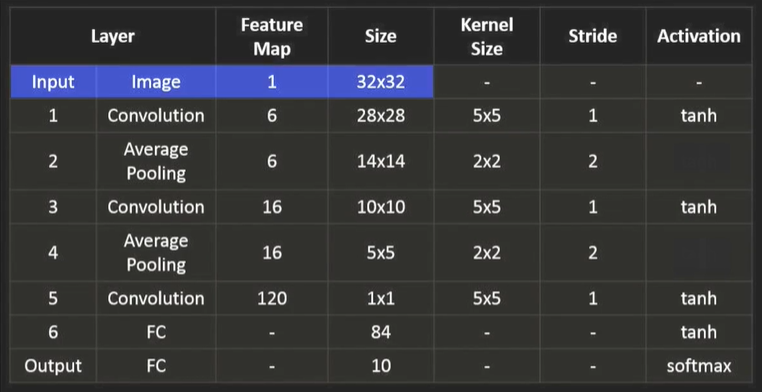![image.png]()![image.png]()![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [ ]:
import torch # импорт библиотек
import random
import numpy as np

random.seed(0) # фиксируем сиды
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets # импорт датасета MNIST

In [ ]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 292444826.78it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 96292284.44it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 204545603.40it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23289154.97it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
len(y_train), len(y_test) # длины выборок

(60000, 10000)

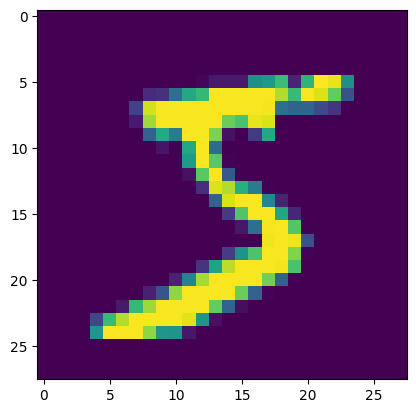

tensor(5)


In [ ]:
import matplotlib.pyplot as plt # действительно цифра 5
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.unsqueeze(1).float() # передаем картинку как трехмерный тензор
X_test = X_test.unsqueeze(1).float()

In [ ]:
X_train.shape # проверяем размерность

torch.Size([60000, 1, 28, 28])

In [ ]:
class LeNet5(torch.nn.Module): # 5 слоев
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d( # Conv2d - двумерный
            in_channels=1, out_channels=6, kernel_size=5, padding=2) # 1ый слой, на вход 1 канал, на выходе 6 каналов, размер ядра свертки - 5
        self.act1  = torch.nn.Tanh() # активация
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2) # первый пуллинг, сожмет с 28х28 изображение до 14х14

        self.conv2 = torch.nn.Conv2d( # 2ой слой
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh() # активация
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2) # пуллинг, с 14х14 до 10х10 (в конечном итогде 5х5)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120) # 1ый полносвязный слой
        self.act3  = torch.nn.Tanh()

        self.fc2   = torch.nn.Linear(120, 84) # 2ой полносвязный слой
        self.act4  = torch.nn.Tanh()

        self.fc3   = torch.nn.Linear(84, 10) # 3ий полносвязный слой

    def forward(self, x): # растянем изображение в один вектор

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3)) # растягиваем тензор на четырехмерный

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5 = LeNet5() # инициализируем сеть

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # будем работать на GPU
lenet5 = lenet5.to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [ ]:
batch_size = 100   # процесс обучения

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test) # качество на тестовой выборке
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9742)
tensor(0.9839)
tensor(0.9848)
tensor(0.9884)
tensor(0.9883)
tensor(0.9864)
tensor(0.9875)
tensor(0.9896)
tensor(0.9879)
tensor(0.9888)
tensor(0.9887)
tensor(0.9897)
tensor(0.9881)
tensor(0.9849)
tensor(0.9903)
tensor(0.9888)
tensor(0.9903)
tensor(0.9891)
tensor(0.9890)
tensor(0.9904)
tensor(0.9893)
tensor(0.9898)
tensor(0.9874)
tensor(0.9878)
tensor(0.9871)
tensor(0.9879)
tensor(0.9878)
tensor(0.9895)
tensor(0.9902)
tensor(0.9900)
tensor(0.9853)
tensor(0.9904)
tensor(0.9895)
tensor(0.9882)
tensor(0.9905)
tensor(0.9879)
tensor(0.9891)
tensor(0.9913)
tensor(0.9854)
tensor(0.9904)
tensor(0.9886)
tensor(0.9894)
tensor(0.9895)
tensor(0.9899)
tensor(0.9871)
tensor(0.9892)
tensor(0.9887)
tensor(0.9889)
tensor(0.9906)
tensor(0.9891)
tensor(0.9888)
tensor(0.9883)
tensor(0.9890)
tensor(0.9890)
tensor(0.9886)
tensor(0.9894)
tensor(0.9893)
tensor(0.9893)


KeyboardInterrupt: ignored

In [ ]:
lenet5.forward(X_test)

tensor([[ -2.4062,   0.4233,   0.5418,  ...,  20.3306,  -5.1684,   1.2979],
        [  1.6505,   0.9701,  22.8198,  ...,  -2.3215,   2.7230,  -7.7609],
        [ -5.9620,  21.8638,  -2.9698,  ...,   1.2626,   1.8916,   0.0841],
        ...,
        [ -9.0616,   0.7905,  -6.8859,  ...,   2.9603,  -1.4665,   5.3308],
        [ -0.0940,  -8.1027, -10.1343,  ...,  -6.3550,   7.6191,  -2.1046],
        [  5.7843,  -2.4411,   0.3175,  ..., -14.0107,   0.1082,  -6.7576]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

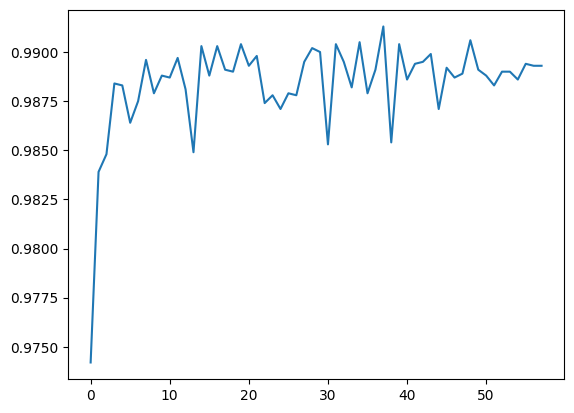

In [ ]:
plt.plot(test_accuracy_history); # график accuracy

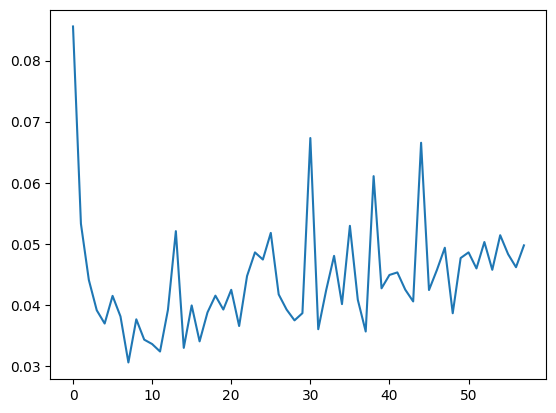

In [ ]:
plt.plot(test_loss_history); # график loss